#Delhi Air Quality Index

>In Delhi, air pollution is a year-round problem. Yet, following the monsoon, air pollution rises because of a combination of meteorological conditions and human activities. Once winter arrives, Delhi should anticipate air that is more than twice as polluted as during the spring and summer.

#Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d deepaksirohiwal/delhi-air-quality

  0% 0.00/423k [00:00<?, ?B/s]
100% 423k/423k [00:00<00:00, 24.1MB/s]


In [ ]:
! mkdir delhi-air-quality
! unzip delhi-air-quality.zip -d delhi-air-quality

Archive:  delhi-air-quality.zip
  inflating: delhi-air-quality/delhi_aqi.csv  


#Importing dataset

In [ ]:
df = pd.read_csv('/content/delhi-air-quality/delhi_aqi.csv')

#Exploratory Data Analysis

Feature extraction:
>Date - date feature is converted into datetime format. 
        Also extracting the day, weekday, month, year and time.

>AQI - The AQI value for a given pollutant is calculated using a formula that takes into account the concentration of the pollutant, the Chigh and Clow, and the Ihigh and Ilow values set by the national standards. 
>>Air quality subindex (SI) is calculated for each feature based on the below formula.

       SI  = ((C - Clow)/(Chigh - Clow)) * (Ihigh - Ilow) + (Ilow)
       

       C - Current pollutant value
       Chigh - Maximum allowed concentration of pollutant under National standards 
       Ihigh - Peak AQI when the pollutant is at the allowed highest

>>AQI is calculated for every row, i.e., for every hour in the day based on the SI values of each pollutant.

>Health - Description label of AQI

#AQI Calculation

In [ ]:
cols = df.columns

standard = {}
#[Chigh, Clow, Ihigh, Ilow]
standard['co'] = [100, 0, 50, 0]
standard['no'] = [400, 0, 200, 0]
standard['no2'] = [400, 0, 200, 0]
standard['o3'] = [180, 0, 100, 0]
standard['so2'] = [120, 0, 80, 0]
standard['pm2_5'] = [500, 0, 500, 0]
standard['pm10'] = [500, 0, 500, 0]
standard['nh3'] = [100, 0, 400, 0]

for index, row in df.iterrows() :

  for x in range(1, 9) :
    col = cols[x]
    si = []
    c = col
    C = row[x]
    chigh = standard[c][0]
    clow = standard[c][1]
    ihigh = standard[c][2]
    ilow = standard[c][3]

    temp = ((C - clow) / (chigh - clow)) * ((ihigh - ilow)) + (ilow)
    si.append(temp)
    
  aqi = max(si)
  df.at[index, 'aqi'] = aqi

In [ ]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44


>Categorization of AQI

In [ ]:
for index, row in df.iterrows() :
  if row['aqi'] <= 50 :
    df.at[index,'Health'] = 'Good'
  elif row['aqi'] <= 100 :
    df.at[index,'Health'] = 'Moderate'
  elif row['aqi'] <= 150 :
    df.at[index,'Health'] = 'Slightly Unhealthy'
  elif row['aqi'] <= 200 :
    df.at[index,'Health'] = 'Unhealthy'
  elif row['aqi'] <= 300 :
    df.at[index,'Health'] = 'Very unhealthy'
  else :
    df.at[index,'Health'] = 'Hazardous'

In [ ]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy


>Separating Dataset

Splitting the dataset into training data for the model and testing data that is unseen to the model. 

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df_jan2023 = df[df['date'].dt.year==2023]

In [ ]:
df_jan2023.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health
18215,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,23.32,Good
18216,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,30.64,Good
18217,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,45.60,Good
18218,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,54.20,Moderate
18219,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,56.76,Moderate


In [ ]:
df_model = df.loc[df['date'].dt.year!=2023]

In [ ]:
df_model.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy


>Extraction of features from 'date' 

In [ ]:
df_visual = df_model.copy()

df_visual['year'] = df_visual['date'].dt.year
df_visual['month'] = df_visual['date'].dt.month
df_visual['day'] = df_visual['date'].dt.day
df_visual['weekday']=df_visual['date'].dt.day_name()
df_visual['time'] = df_visual['date'].dt.hour
seasons = { 1:'Winter', 2:'Winter', 3:'Summer', 4:'Summer', 5:'Summer',
           6:'Monsoon', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
df_visual['seasons']=df_visual['month'].map(seasons)

In [ ]:
df_model.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy


In [ ]:
df_visual = df_visual.set_index('date')
df_visual.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health,year,month,day,weekday,time,seasons
date,,,,,,,,,,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy,2020,11,25,Wednesday,1,Autumn
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy,2020,11,25,Wednesday,2,Autumn
2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy,2020,11,25,Wednesday,3,Autumn
2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy,2020,11,25,Wednesday,4,Autumn
2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy,2020,11,25,Wednesday,5,Autumn


#Visualisation

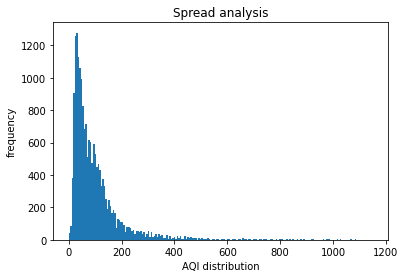

In [ ]:
plt.hist(df['aqi'], bins = 200)
plt.xlabel('AQI distribution')
plt.ylabel('frequency')
plt.title('Spread analysis')
plt.show()

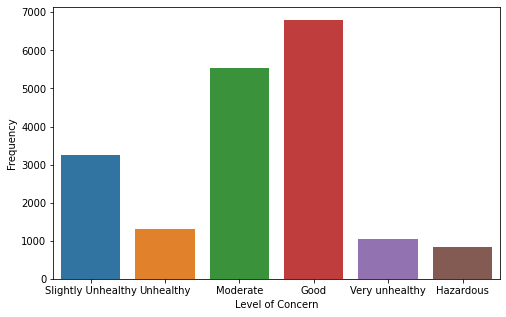

In [ ]:
plt.figure(figsize=[8,5])
sns.countplot(data=df_visual, x=df['Health'])
plt.xlabel("Level of Concern")
plt.ylabel("Frequency")
plt.show()

>The distribution is left skewed. 

>The majority of the data points have AQI's between 0 and 150 which means that the livability condition is  between Good and Unhealthy for sensitive groups.


#Outlier analysis

In [ ]:
def find_outliers_tukey(x):
  q1 = np.percentile(x,5)
  q3 = np.percentile(x,95)
  iqr = q3-q1
  floor = q1 - 1.5*iqr
  ceiling = q3 + 1.5*iqr
  outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
  outlier_values = list(x[outlier_indices])

  return outlier_indices, outlier_values

In [ ]:
def plot_outliers(data, name):
    ax = sns.boxplot(x=data, whis = 3.0, showfliers = True)
    ax = sns.stripplot(x=data, color="pink", jitter=0.2, size=3)
    ax.set_xlabel('Distribution of values')
    
    ax.set_title(name)

    plt.show()

Outlier Values are:  []


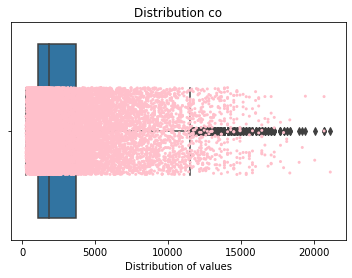

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(df['co'])
print("Outlier Values are: ", np.sort(tukey_values))

plot_outliers(df['co'], "Distribution co")

Outlier Values are:  [432.73 436.31 439.88 439.88 439.88 439.88 450.61 454.19 457.76 464.92
 472.07 472.07 479.22 500.68 500.68]


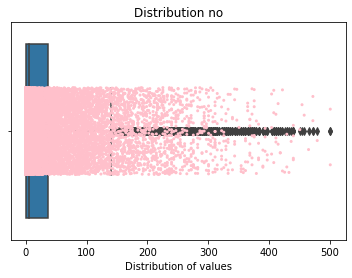

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(df['no'])
print("Outlier Values are: ", np.sort(tukey_values))

plot_outliers(df['no'], "Distribution no")

Outlier Values are:  [389.34 389.34 389.34 389.34 394.82 394.82 400.31 405.79 416.76 422.24
 422.24 433.21 433.21 444.17 444.17 460.62]


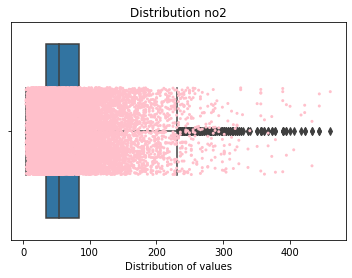

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(df['no2'])
print("Outlier Values are: ", np.sort(tukey_values))

plot_outliers(df['no2'], "Distribution no2")

Outlier Values are:  [555.04 555.04 566.48 577.93 583.65 583.65 635.15 698.09 743.87 766.75
 778.2  789.64 801.09]


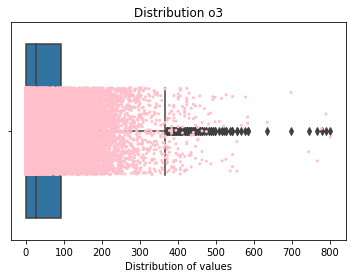

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(df['o3'])
print("Outlier Values are: ", np.sort(tukey_values))

plot_outliers(df['o3'], "Distribution o3")

Outlier Values are:  [373.84 373.84 377.66 377.66 381.47 381.47 381.47 381.47 381.47 385.28
 385.28 392.91 392.91 392.91 396.73 396.73 396.73 400.54 438.69 442.5
 446.32 450.13 450.13 453.95 461.58 465.39 488.28 488.28 495.91 495.91
 511.17 518.8  534.06 534.06 541.69 556.95 564.58 579.83]


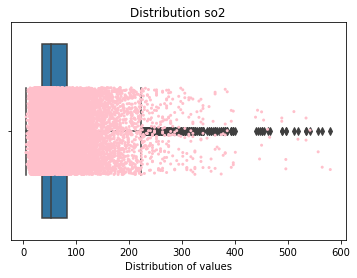

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(df['so2'])
print("Outlier Values are: ", np.sort(tukey_values))

plot_outliers(df['so2'], "Distribution so2")

Outlier Values are:  []


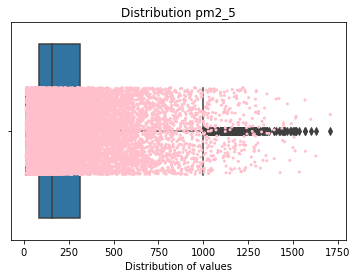

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(df['pm2_5'])
print("Outlier Values are: ", np.sort(tukey_values))

plot_outliers(df['pm2_5'], "Distribution pm2_5")

Outlier Values are:  []


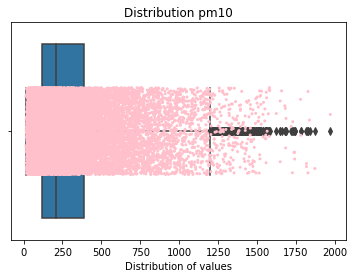

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(df['pm10'])
print("Outlier Values are: ", np.sort(tukey_values))

plot_outliers(df['pm10'], "Distribution pm10")

Outlier Values are:  [170.23 170.23 170.23 170.23 170.23 172.26 172.26 172.26 172.26 174.28
 174.28 174.28 174.28 174.28 174.28 176.31 176.31 176.31 176.31 176.31
 178.34 178.34 178.34 180.36 180.36 182.39 182.39 182.39 184.42 184.42
 186.44 186.44 186.44 186.44 188.47 190.5  190.5  192.52 192.52 192.52
 192.52 194.55 196.58 196.58 196.58 196.58 196.58 196.58 198.6  198.6
 198.6  198.6  200.63 200.63 200.63 200.63 200.63 200.63 202.66 202.66
 202.66 202.66 202.66 204.68 206.71 206.71 208.74 208.74 210.76 212.79
 212.79 212.79 212.79 214.82 216.84 216.84 218.87 218.87 218.87 222.92
 222.92 222.92 224.95 229.   229.   231.03 231.03 233.05 237.11 239.13
 241.16 241.16 243.19 243.19 245.21 245.21 245.21 247.24 247.24 249.27
 253.32 253.32 257.37 257.37 267.51 267.51 267.51 267.51 271.56 271.56
 275.61 287.77]


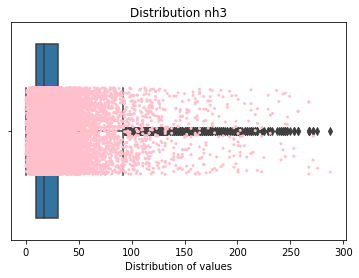

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(df['nh3'])
print("Outlier Values are: ", np.sort(tukey_values))

plot_outliers(df['nh3'], "Distribution nh3")

>For the outlier analysis, we have figured out the outlier values both numerically and visually. However, we choose not to remove any outliers from the dataset because of the following real world off the screen ground realities:  

- There are both bad days and good days with respect to the air quality and it's important to register the extremities to take into account the reasoning behind such values and figure out the causality for that particular event. For instance if the AQI levels were too high in October, one can deduce the festivities as the culprit behind such spikes in AQI. 
- Moreover, its important to have a real picture of the the AQI ranges, since that can be present a shocking value good enough to make the indifferent government authorities work towards mitigating pollution levels.   

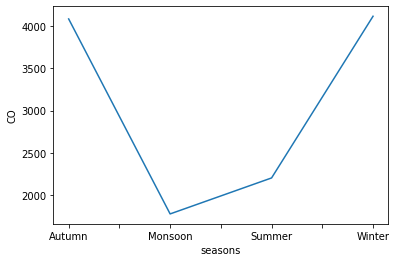

In [ ]:
df_visual.iloc[:, 0].groupby(df_visual['seasons']).agg('mean').plot(kind='line')
plt.ylabel("CO")
plt.show()

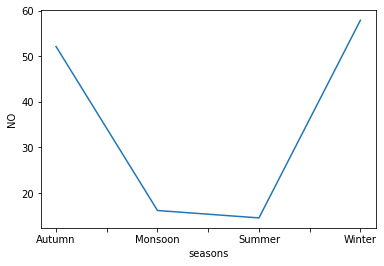

In [ ]:
df_visual.iloc[:, 1].groupby(df_visual['seasons']).agg('mean').plot(kind='line')
plt.ylabel("NO")
plt.show()

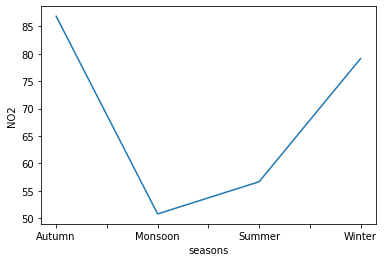

In [ ]:
df_visual.iloc[:, 2].groupby(df_visual['seasons']).agg('mean').plot(kind='line')
plt.ylabel("NO2")
plt.show()

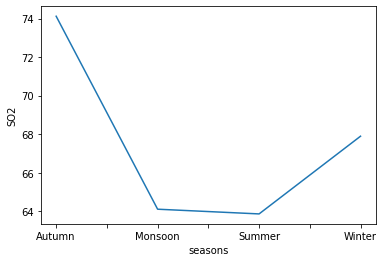

In [ ]:
df_visual.iloc[:, 4].groupby(df_visual['seasons']).agg('mean').plot(kind='line')
plt.ylabel("SO2")
plt.show()

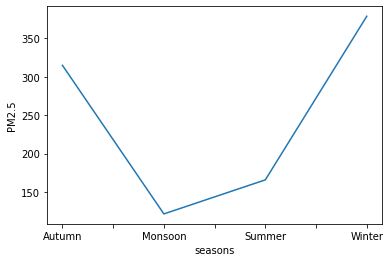

In [ ]:
df_visual.iloc[:, 5].groupby(df_visual['seasons']).agg('mean').plot(kind='line')
plt.ylabel("PM2.5")
plt.show()

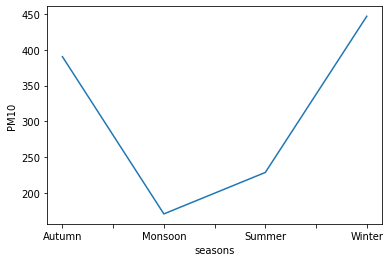

In [ ]:
df_visual.iloc[:, 6].groupby(df_visual['seasons']).agg('mean').plot(kind='line')
plt.ylabel("PM10")
plt.show()

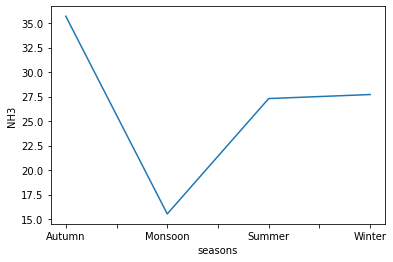

In [ ]:
df_visual.iloc[:, 7].groupby(df_visual['seasons']).agg('mean').plot(kind='line')
plt.ylabel("NH3")
plt.show()

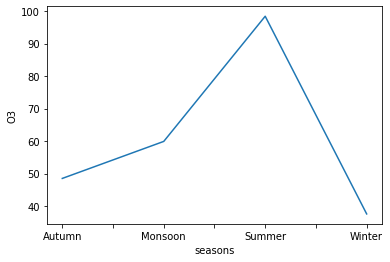

In [ ]:
df_visual.iloc[:, 3].groupby(df_visual['seasons']).agg('mean').plot(kind='line')
plt.ylabel("O3")
plt.show()

>As we can see Delhi Air quality is bad after Monsoons i.e in Autumn and Winter, this is beacuse of winter inversion<br>

>Generally ground gets cold faster than air, this phenomenon causes temperature or winter inversion. During the winter, the air near ground can sometimes get really cold, while the air higher up is warmer. This hot  air acts as a lid that traps the air under. As a result , pollutants can accumulate and persist in lower atmosphere, making the air more polluter and harmful to breathe

>Some of the causes of the rise in air pollutants include the the valley effect, industrial pollutants, and vehicle emissions. Winter pollution is additionally exacerbated by dust storms, agricultural fires, burning of solid fuels for heating, and pollution from firecrackers during Diwali.

>During summer, the weather is typically warm and sunny, and this can cause the levels of ozone to increase in the atmosphere.Ozone is a gas that is formed when nitrogen oxide and volatile organic compounds react with sunlight. These components are released into the atmosphere by human activities, like burning fossil fuels, vehicle emissions, using certain chemicals.






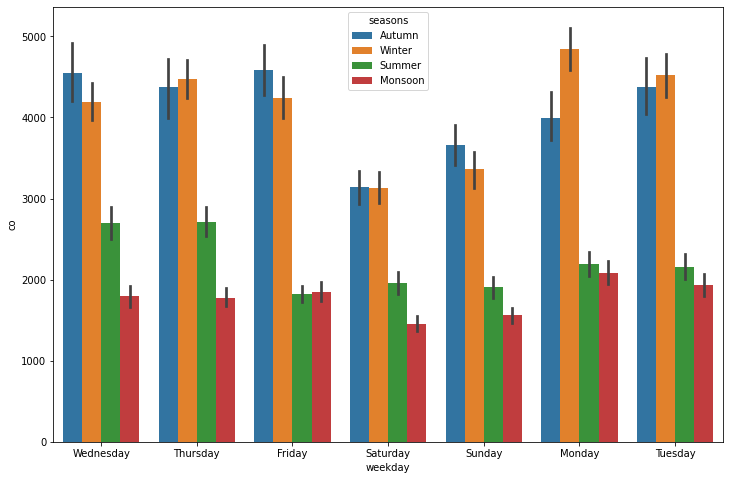

In [ ]:
fig, ax= plt.subplots(figsize=(12,8))
sns.barplot(data=df_visual,x='weekday',y='co',hue='seasons',ax=ax,linewidth=1)
plt.show()

>The concentration of CO in the atmosphere is greater during the weekdays of winter and autumn as compared to the weekends in those seasons, because a lot less number of trains and cars are running on weekends to commute people to and from their work. 

>Summer and Monsoon have similar concentrations of CO during the weekdays and the weekends.

>As compared to other seasons, Monsoons are rightly the least polluted ones which makes sense because a lot of pollution matter are washed away from the atmosphere, flowing away the rain into the ground. 

>

month
1    AxesSubplot(0.125,0.2;0.775x0.68)
Name: aqi, dtype: object

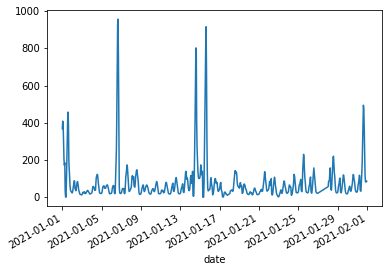

In [ ]:
df_visual_2021 = df_visual[(df_visual['year']==2021) & (df_visual['month']==1)]
df_visual_2021.groupby('month').aqi.plot()

[12]


<AxesSubplot:xlabel='time', ylabel='aqi'>

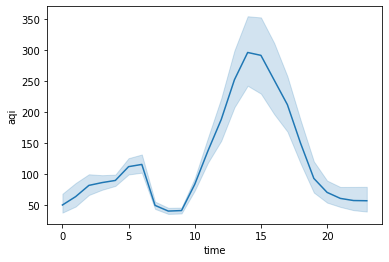

In [ ]:
df_visual_2020 = df_visual[(df_visual['year']==2020) & (df_visual['month']==12)]
print(df_visual_2020.month.unique())
sns.lineplot(data=df_visual_2020, x=df_visual_2020['time'], y=df_visual_2020['aqi'])

[12]


<AxesSubplot:xlabel='time', ylabel='aqi'>

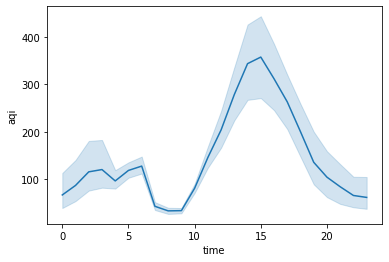

In [ ]:
df_visual_2021 = df_visual[(df_visual['year']==2021) & (df_visual['month']==12)]
print(df_visual_2021.month.unique())
sns.lineplot(data=df_visual_2021, x=df_visual_2021['time'], y=df_visual_2021['aqi'])

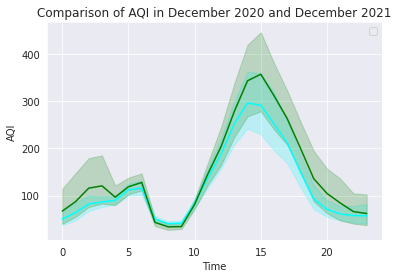

In [ ]:
sns.set_style("darkgrid")
sns.lineplot(data=df_visual_2020, x=df_visual_2020['time'], y=df_visual_2020['aqi'], color="cyan")
sns.lineplot(data=df_visual_2021, x=df_visual_2021['time'], y=df_visual_2021['aqi'], color= "green")

plt.legend()
plt.title("Comparison of AQI in December 2020 and December 2021")
plt.xlabel('Time')
plt.ylabel('AQI')
plt.show()

>The air quality index reaches a peak during the 3:00 PM hour of the day.
> One of the primary reasons is the increased vehicular traffic till 3:00 PM and from then the Air quality index keeps reducing as there traffic go down.

<AxesSubplot:xlabel='no2_so2', ylabel='co'>

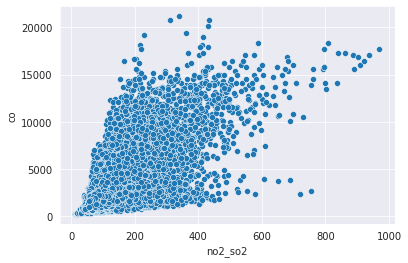

In [ ]:
df_visual['no2_so2'] = df_visual['no2']+df_visual['so2']

sns.scatterplot(data=df_visual, x=df_visual['no2_so2'], y=df_visual['co'])

Slope= 21.90758448660174


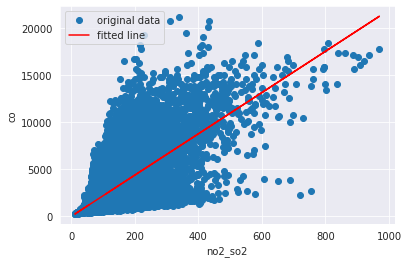

In [ ]:
from scipy.stats import linregress
x = df_visual['no2_so2']
y = df_visual['co']
res = linregress(x,y)
print("Slope=", res.slope)
plt.xlabel('no2_so2')
plt.ylabel('co')
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

>NO2 and SO2 are not directly related to CO. However, the presence of NO2 and SO2 in the air can indirectly affect the levels of CO in the atmosphere. 

<AxesSubplot:>

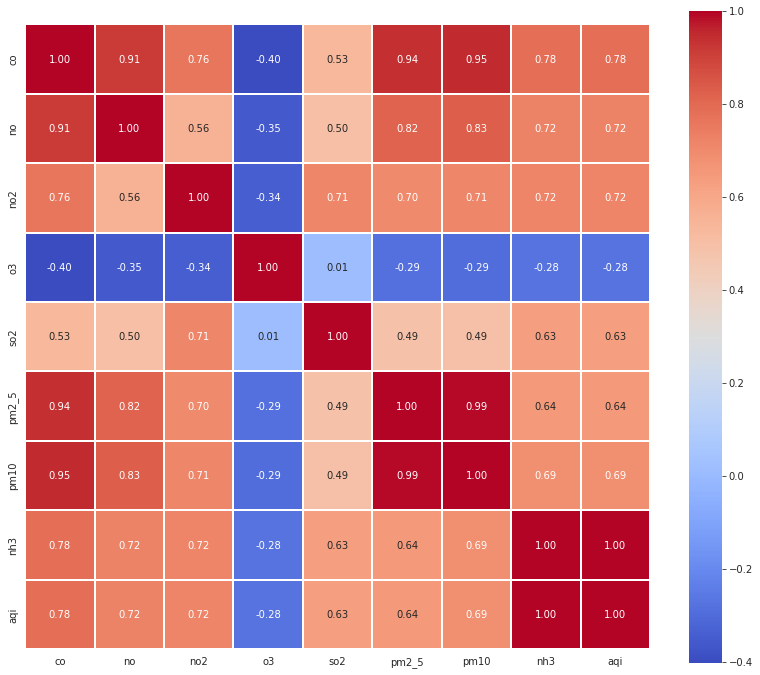

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True, linewidths=2)

#Preprocessing of training dataset

In [ ]:
df_train = df_model
df_test = df_jan2023

In [ ]:
df_model.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy


In [ ]:
df_train = df_train.drop(['date','Health'],axis=1)

In [ ]:
df_test = df_test.drop(['date','Health'],axis=1)

In [ ]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [ ]:
X.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
y.head()

0    114.52
1    164.16
2    196.56
3    192.52
4    186.44
Name: aqi, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=127)

In [ ]:
print(f"Shape of X_Train: {X_train.shape}\nShape of y_Train: {y_train.shape}\nShape of X_Test: {X_test.shape}\nShape of y_test: {y_test.shape}")

Shape of X_Train: (14572, 8)
Shape of y_Train: (14572,)
Shape of X_Test: (3643, 8)
Shape of y_test: (3643,)


#Building model on training dataset

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
# Model Tuning
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Data Preprocessing
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning

import xgboost
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt


In [ ]:
models = [("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
# ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error", error_score='raise')))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.0 (Ridge) 
RMSE: 0.0793 (Lasso) 
RMSE: 0.2007 (ElasticNet) 
RMSE: 40.9982 (KNN) 
RMSE: 0.9352 (CART) 
RMSE: 0.6499 (RF) 
RMSE: 67.4682 (SVR) 
RMSE: 1.1456 (GBM) 
RMSE: 0.9008 (XGBoost) 
RMSE: 3.8522 (LightGBM) 


# RandomForestRegressor Model including NH3

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_true = np.array(y_test)
y_predicted = np.array(y_pred)
df_1 = pd.DataFrame({'y_true': y_true, 'y_pred': y_predicted})
df_1.head()

,y_true,y_pred
0,13.44,13.4424
1,25.60,25.6000
2,47.12,47.1200
3,20.76,20.7600
4,31.16,31.1600


In [ ]:
df_2 = pd.DataFrame({'A': y_true, 'B': y_predicted})

In [ ]:
count = 0
diff = df_2['B'] - df_2['A']
for i in diff :
  if i > 16 :
    # print('Incorrect')
    pass
  else :
    # print('Correct')
    count += 1

rows = len(y_test)

print("There were", count, "number of labels correctly predicted in the test dataset out of", rows, "instances, with an error scope of 10.")
print('Accuracy Percentage : ', count/rows * 100)

There were 3642 number of labels correctly predicted in the test dataset out of 3643 instances, with an error scope of 10.
Accuracy Percentage :  99.97255009607467


In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_ , index=X_train.columns, columns=['importance'])

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances in a tabular format
print(feature_importances)

         importance
nh3    9.999425e-01
no2    1.583989e-05
so2    1.357879e-05
co     1.063690e-05
no     7.017996e-06
pm2_5  6.226476e-06
pm10   4.139532e-06
o3     5.472500e-08


In [ ]:
print(feature_importances.sum())

importance    1.0
dtype: float64


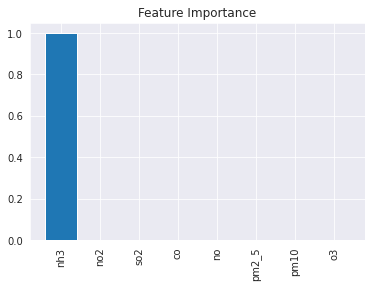

In [ ]:
# get the feature importances
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

Why do we end up deleting the most corelated and the most important feature, that is NH3 from the modeling of the dataset ? 

 - One of the reasons is that we want to figure out how the other features are contributing to the prediction of AQI values in absence of NH3 which has a high corelation and if we fit the model while keeping that in the dataset, then that might lead to overfitting the data and also the undervaluing the contribution behind other factors as explained by the Feature Importance (where NH3 takes up the score of 0.9, that leaves other features with negligible influence). 

 - Secondly the most important factor is something that the authorities can anyway try to deal with on their own. In this case, it's NH3 which is something that the governement is dedicated to work upon. 
 Therefore, running the model on other features might not be a good idea behind the prediction, if we are trying to aim for Accuracy, however, that might be a good step to undertake if we have to analyse the feedback of other features in this dataset, hence giving a well sorted palette for the govt to take necessary actions for reduxing the accordingly important pollutants. 

In [ ]:
new_df_train = df_train.drop('nh3',axis=1)

In [ ]:
new_df_train.head()

,co,no,no2,o3,so2,pm2_5,pm10,aqi
0,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,114.52
1,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,164.16
2,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,196.56
3,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,192.52
4,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,186.44


In [ ]:
new_X = new_df_train.drop('aqi', axis=1)
new_y = new_df_train['aqi']

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=127)

In [ ]:
models = [("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
# ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, new_X, new_y, cv=5, scoring="neg_mean_squared_error", error_score='raise')))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 52.8541 (Ridge) 
RMSE: 52.8497 (Lasso) 
RMSE: 52.8495 (ElasticNet) 
RMSE: 46.3761 (KNN) 
RMSE: 47.4009 (CART) 
RMSE: 34.39 (RF) 
RMSE: 67.5771 (SVR) 
RMSE: 36.3125 (GBM) 
RMSE: 34.6015 (XGBoost) 
RMSE: 33.9247 (LightGBM) 


# LGBMRegressor Model excluding nh3

In [ ]:
new_model = LGBMRegressor()
new_model.fit(new_X_train,new_y_train)

LGBMRegressor()

In [ ]:
new_y_pred = new_model.predict(new_X_test)

In [ ]:
new_X_train.columns

Index(['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10'], dtype='object')

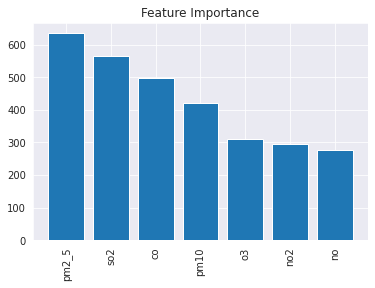

In [ ]:
new_importances = new_model.feature_importances_

indices = np.argsort(new_importances)[::-1]

names = [new_X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(new_X_train.shape[1]), new_importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(new_X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
y_true = np.array(new_y_test)
y_predicted = np.array(new_y_pred)

In [ ]:
df1 = pd.DataFrame({'y_true': y_true, 'y_pred': y_predicted})
df1.head()

,y_true,y_pred
0,13.44,47.899466
1,25.60,25.958635
2,47.12,43.157271
3,20.76,38.495438
4,31.16,29.324302


In [ ]:
df2 = pd.DataFrame({'A': y_true, 'B': y_predicted})

In [ ]:
df2['difference'] = df2['B'] - df2['A']
print(df2)

           A           B  difference
0      13.44   47.899466   34.459466
1      25.60   25.958635    0.358635
2      47.12   43.157271   -3.962729
3      20.76   38.495438   17.735438
4      31.16   29.324302   -1.835698
...      ...         ...         ...
3638   62.84   88.180934   25.340934
3639   85.12   89.950844    4.830844
3640  156.04  136.074446  -19.965554
3641  239.12  257.404413   18.284413
3642  689.04  815.170872  126.130872

[3643 rows x 3 columns]


In [ ]:
count = 0
diff = df2['B'] - df2['A']
for i in diff :
  if i > 16 :
    # print('Incorrect')
    pass
  else :
    # print('Correct')
    count += 1

rows = len(new_y_test)

print("There were", count, "number of labels correctly predicted in the test dataset out of", rows, "instances, with an error scope of 16.")
print('Accuracy Percentage : ', count/rows * 100)

There were 2883 number of labels correctly predicted in the test dataset out of 3643 instances, with an error scope of 16.
Accuracy Percentage :  79.13807301674444


# RandomForestRegressor model excluding NH3


In [ ]:
model.fit(new_X_train,new_y_train)
new_y_pred = model.predict(new_X_test)
y_test = np.array(new_y_test)
y_pred = np.array(new_y_pred)
df1 = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})

In [ ]:
df_2 = pd.DataFrame({'A': y_test, 'B': y_pred})

In [ ]:
df_2['difference'] = df_2['B'] - df_2['A']
print(df2)

           A           B  difference
0      13.44   47.899466   34.459466
1      25.60   25.958635    0.358635
2      47.12   43.157271   -3.962729
3      20.76   38.495438   17.735438
4      31.16   29.324302   -1.835698
...      ...         ...         ...
3638   62.84   88.180934   25.340934
3639   85.12   89.950844    4.830844
3640  156.04  136.074446  -19.965554
3641  239.12  257.404413   18.284413
3642  689.04  815.170872  126.130872

[3643 rows x 3 columns]


In [ ]:
count = 0
diff = df_2['B'] - df_2['A']
for i in diff :
  if i > 16 :
    # print('Incorrect')
    pass
  else :
    # print('Correct')
    count += 1

rows = len(new_y_test)

print("There were", count, "number of labels correctly predicted in the test dataset out of", rows, "instances, with an error scope of 16.")
print('Accuracy Percentage : ', count/rows * 100)

There were 2907 number of labels correctly predicted in the test dataset out of 3643 instances, with an error scope of 16.
Accuracy Percentage :  79.79687071095252


#Predicting values for unseen data for the month of Jan 2023

In [ ]:
#Selecting Jan 2023 data from dataset
df_jan2023 = df[df['date'].dt.year==2023]
df_jan2023.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health
18215,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,23.32,Good
18216,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,30.64,Good
18217,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,45.60,Good
18218,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,54.20,Moderate
18219,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,56.76,Moderate


In [ ]:
#assigning Jan 2023 data to df_test and dropping date and heealth columns
df_test = df_jan2023
df_test = df_test.drop(['date','Health'],axis=1)

In [ ]:
jan_X = df_test.drop(['nh3','aqi'],axis=1)

In [ ]:
jan_y = df_jan2023['aqi'] 

In [ ]:
#jan_y_true = df_train.iloc[:, -1].values 

In [ ]:
jan_X.head()

,co,no,no2,o3,so2,pm2_5,pm10
18215,1655.58,1.66,39.41,5.90,17.88,169.29,194.64
18216,1869.20,6.82,42.16,1.99,22.17,182.84,211.08
18217,2510.07,27.72,43.87,0.02,30.04,220.25,260.68
18218,3150.94,55.43,44.55,0.85,35.76,252.90,304.12
18219,3471.37,68.84,45.24,5.45,39.10,266.36,322.80


In [ ]:
jan_y.head()

18215    23.32
18216    30.64
18217    45.60
18218    54.20
18219    56.76
Name: aqi, dtype: float64

In [ ]:
jan_y_pred = new_model.predict(jan_X)

In [ ]:
#converting Jan_y series to numpy array
jan_y_up = np.array(jan_y)

In [ ]:
flag = 0
for i in range(0,561) :
  # print(jan_y_true[i], "True")
  # print(jan_y_pred[i], "Pred")
  if abs(jan_y_pred[i] - jan_y_up[i]) <= 36 :
    flag += 1

print(flag, len(jan_y))
rows = len(jan_y)
#new

465 561


In [ ]:
print("There were", flag, "number of labels correctly predicted in the test dataset out of", rows, "instances, with an error scope of 36.")
print('Accuracy Percentage for : ', flag/rows * 100)
#new

There were 465 number of labels correctly predicted in the test dataset out of 561 instances, with an error scope of 36.
Accuracy Percentage for :  82.88770053475936


##Reflections

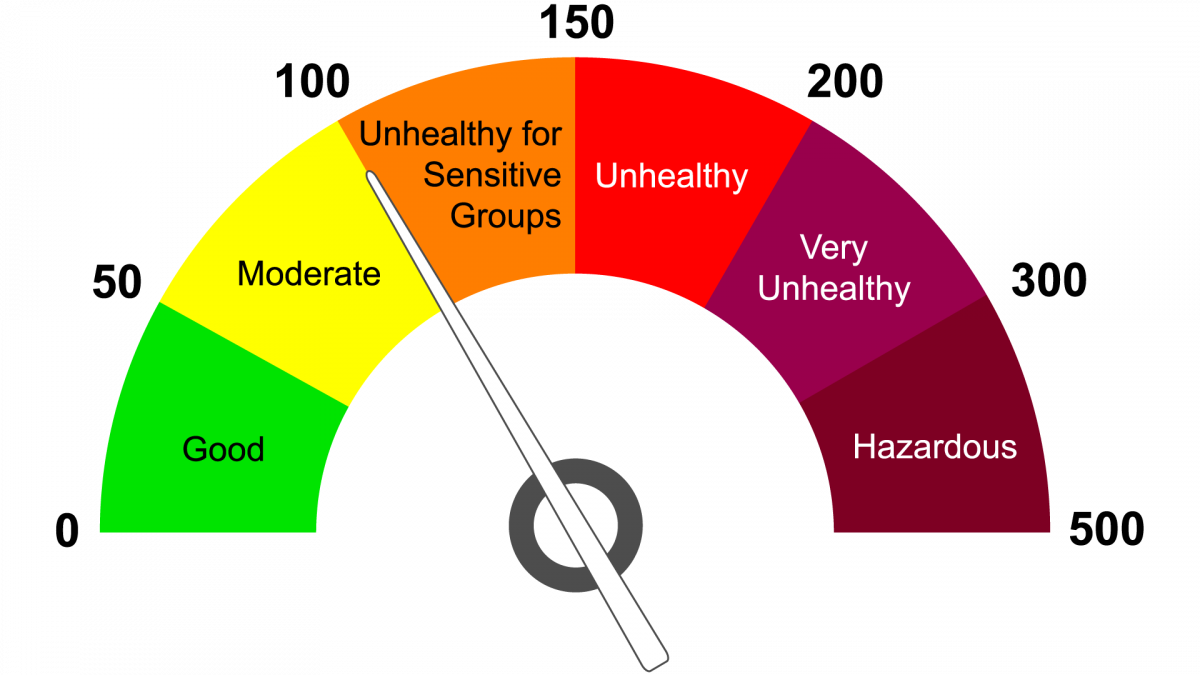

During winter and autumn, the air quality in Delhi is very poor, whereas during monsoon and summer it is moderately poor. Essentially, the air quality in Delhi is bad for most of the year. In the summer season specifically, the levels of pollutants are as follows:
PM10 : moderate, 
PM2.5 : severe, 
NO2 and O3 : satisfactory,
CO : moderate, 
SO2 : satisfactory, 
NH3 : good.

The air quality is generally good in the morning, but as the day progresses, the air quality worsens and reaches a severe condition.

The air quality is worse on weekdays than on weekends, possibly because there is less traffic on weekends.

>> **Severity of the problem**: Delhi has been facing severe air pollution problems for many years, and the situation has continued to worsen. It is important to highlight the severity of the problem and its impact on public health, environment, and quality of life.

>> **Contributing factors**: The air pollution in Delhi is the result of multiple pollutants included in our dataset, such as CO, NO, NO2, and others. These pollutants are emitted from various sources, including vehicular emissions, industrial pollution, construction dust, agricultural burning, and more. It is important to discuss the contributing factors and their relative importance in causing air pollution in the city.

>> **Health impacts**: The poor air quality in Delhi has severe health impacts, including increased risk of respiratory diseases, heart diseases, stroke, and lung cancer. It is crucial to consider the health impacts of air pollution and how they affect the overall wellbeing of individuals and the community.

>> **Government initiatives**: The government has implemented several initiatives to address the air pollution problem in Delhi, including the implementation of the odd-even rule, shutting down of thermal power plants, and the implementation of air quality monitoring stations.

>> **Personal responsibility**: While the government has a critical role to play in addressing air pollution, individuals also have a personal responsibility to reduce their contribution to the problem. It is crucial to consider the responsibility of individuals in reducing air pollution, which involves taking actions such as minimizing the use of personal vehicles, opting for public transportation, and reducing the consumption of single-use plastic.

>> **Future outlook**: Finally, Although some positive measures have been taken to address the issue, it still remains a significant concern. Therefore, it is essential to examine possible future initiatives and strategies that can be adopted to further mitigate air pollution in the city.